In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import joblib
import uuid


In [2]:
uniqueid = uuid.uuid4().int & (1 << 64)-1


In [3]:
use_pre_trained_embeds = False

In [4]:
# dataset_dir = "imdb"
dataset_dir = "sentiment140"

model_dir = "models"
visuals_dir = "visuals"

# load a preprocessed dataframe see: (https://github.com/3nws/twitter-text-classification/blob/main/notebooks/process_dataframes.ipynb)
df = joblib.load(
    "../dataframes/df_imdb.pkl") if dataset_dir == "imdb" else joblib.load("../dataframes/df_sentiment140.pkl")

In [5]:
df.columns=["text", "sentiment"]

In [6]:
# df = df[730000:850000] if dataset_dir == "sentiment140" else df

In [7]:
df.shape

(1583691, 2)

In [8]:
df.head()

,text,sentiment
0,awww bummer shoulda got david carr third day,0
1,upset cant updat facebook text might cri resul...,0
2,dive mani time ball manag save 50 rest go bound,0
3,whole bodi feel itchi like fire,0
4,behav im mad whi becaus cant see,0


C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

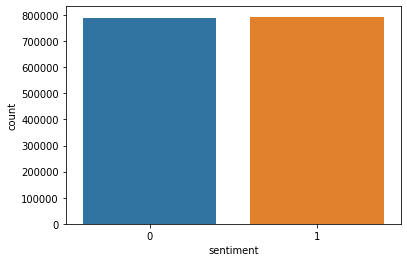

In [9]:

import seaborn as sns

sns.countplot(df.sentiment)


In [10]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)


In [11]:
len(counter)

402749

In [12]:
counter

Counter({'awww': 5018,
         'bummer': 1457,
         'shoulda': 348,
         'got': 60673,
         'david': 2444,
         'carr': 90,
         'third': 826,
         'day': 100449,
         'upset': 2942,
         'cant': 62196,
         'updat': 9008,
         'facebook': 4288,
         'text': 5463,
         'might': 9577,
         'cri': 8355,
         'result': 1632,
         'school': 20245,
         'today': 65739,
         'also': 10250,
         'blah': 1469,
         'dive': 267,
         'mani': 8974,
         'time': 63992,
         'ball': 1924,
         'manag': 2495,
         'save': 3647,
         '50': 1278,
         'rest': 5761,
         'go': 136068,
         'bound': 399,
         'whole': 5963,
         'bodi': 2642,
         'feel': 50080,
         'itchi': 447,
         'like': 82703,
         'fire': 1889,
         'behav': 225,
         'im': 176927,
         'mad': 4112,
         'whi': 27425,
         'becaus': 13438,
         'see': 50555,
         'c

In [13]:
counter.most_common(5)

[('im', 176927),
 ('go', 136068),
 ('get', 109408),
 ('day', 100449),
 ('good', 89349)]

In [14]:
num_unique_words = len(counter)

In [15]:
# Split dataset into training and validation set

from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 0], df.iloc[:, 1]

train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=42)

train_sentences = train_sentences.to_numpy()
val_sentences = val_sentences.to_numpy()
train_labels = train_labels.to_numpy()
val_labels = val_labels.to_numpy()


In [16]:
train_sentences.shape, val_sentences.shape, train_labels.shape, val_labels.shape


((1108583,), (475108,), (1108583,), (475108,))

In [17]:
type(train_sentences), type(val_sentences), type(train_labels), type(val_labels),

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [18]:
train_sentences[:1], train_labels[:1]

(array(['imaddict suuuusshhhhiiii'], dtype=object), array([1]))

In [19]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 50000
# max_features = num_unique_words

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [20]:
# each word has unique index
word_index = tokenizer.word_index

In [21]:
word_index

{'im': 1,
 'go': 2,
 'get': 3,
 'day': 4,
 'good': 5,
 'work': 6,
 'like': 7,
 'love': 8,
 'dont': 9,
 'today': 10,
 'time': 11,
 'cant': 12,
 'got': 13,
 'thank': 14,
 'want': 15,
 'one': 16,
 'miss': 17,
 'back': 18,
 'lol': 19,
 'know': 20,
 'u': 21,
 'think': 22,
 'see': 23,
 'feel': 24,
 'realli': 25,
 'well': 26,
 'hope': 27,
 'night': 28,
 'watch': 29,
 'still': 30,
 'need': 31,
 'make': 32,
 'new': 33,
 'amp': 34,
 'home': 35,
 'look': 36,
 'come': 37,
 '2': 38,
 'oh': 39,
 'much': 40,
 'last': 41,
 'twitter': 42,
 'morn': 43,
 'great': 44,
 'tomorrow': 45,
 'wish': 46,
 'wait': 47,
 'ill': 48,
 'sad': 49,
 'sleep': 50,
 'haha': 51,
 'bad': 52,
 'tri': 53,
 'fun': 54,
 'week': 55,
 'right': 56,
 'onli': 57,
 'whi': 58,
 'follow': 59,
 'happi': 60,
 'didnt': 61,
 'would': 62,
 'veri': 63,
 'thing': 64,
 'friend': 65,
 'sorri': 66,
 'tonight': 67,
 'say': 68,
 'way': 69,
 'take': 70,
 'gonna': 71,
 'though': 72,
 'nice': 73,
 'ive': 74,
 'better': 75,
 'hate': 76,
 'even': 77,
 '

In [22]:
len_of_vocab = len(word_index)

In [23]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [24]:
print(train_sentences[14:15])
print(train_sequences[14:15])

['absolut awar better choic make']
[[671, 3106, 75, 1040, 32]]


In [25]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = max([len(text) for text in train_sequences]) if dataset_dir == "sentiment140" else 50
max_length

29

In [26]:

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((1108583, 29), (475108, 29))

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_padded, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_padded, val_labels))


In [28]:
len(train_dataset), len(val_dataset)


(1108583, 475108)

In [29]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [30]:
train_dataset, val_dataset


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 29), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 29), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [31]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [32]:
reverse_word_index

{1: 'im',
 2: 'go',
 3: 'get',
 4: 'day',
 5: 'good',
 6: 'work',
 7: 'like',
 8: 'love',
 9: 'dont',
 10: 'today',
 11: 'time',
 12: 'cant',
 13: 'got',
 14: 'thank',
 15: 'want',
 16: 'one',
 17: 'miss',
 18: 'back',
 19: 'lol',
 20: 'know',
 21: 'u',
 22: 'think',
 23: 'see',
 24: 'feel',
 25: 'realli',
 26: 'well',
 27: 'hope',
 28: 'night',
 29: 'watch',
 30: 'still',
 31: 'need',
 32: 'make',
 33: 'new',
 34: 'amp',
 35: 'home',
 36: 'look',
 37: 'come',
 38: '2',
 39: 'oh',
 40: 'much',
 41: 'last',
 42: 'twitter',
 43: 'morn',
 44: 'great',
 45: 'tomorrow',
 46: 'wish',
 47: 'wait',
 48: 'ill',
 49: 'sad',
 50: 'sleep',
 51: 'haha',
 52: 'bad',
 53: 'tri',
 54: 'fun',
 55: 'week',
 56: 'right',
 57: 'onli',
 58: 'whi',
 59: 'follow',
 60: 'happi',
 61: 'didnt',
 62: 'would',
 63: 'veri',
 64: 'thing',
 65: 'friend',
 66: 'sorri',
 67: 'tonight',
 68: 'say',
 69: 'way',
 70: 'take',
 71: 'gonna',
 72: 'though',
 73: 'nice',
 74: 'ive',
 75: 'better',
 76: 'hate',
 77: 'even',
 7

In [33]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [34]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[2068, 38580, 213, 293, 21886, 51, 611, 4]
hay bkas n class naku haha 1st day


In [41]:
embedding_dim = 64
lstm_dim = int(embedding_dim/2)

if use_pre_trained_embeds:
    embeddings_dictionary = dict()
    glove_file = open('../embeds/glove.6B.300d.txt', 'rb')

    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

    glove_file.close()

    embeddings_matrix = np.zeros((num_unique_words, embedding_dim))
    for word, index in tokenizer.word_index.items():
        embedding_vector = embeddings_dictionary.get(word)
        if embedding_vector is not None:
            embeddings_matrix[index] = embedding_vector


In [42]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, SpatialDropout1D, Dropout
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import L1, L2

In [43]:
# 'softmax' activation function returns a probability distribution
# Binary for 0-1, Categorical for 2 or more classes, SparseCategorical for when labels are integers
# Dropout is used to prevent overfitting by randomly setting inputs to 0 at a low rate
# For stacked LSTMs set return_sequences to True except for the last one
# trainable parameter in Embedding layer should still be set to True when using already trained weights (it is by default anyway)

# 0
def one():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim,
                        input_length=max_length, name="embeddinglayer", weights=[embeddings_matrix], trainable=True))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 1
def two():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(LSTM(embedding_dim, dropout=0.1))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        "binary_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model
    
# 2
def three():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(LSTM(embedding_dim, dropout=0.1))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 3
def four():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.2)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        # "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 4
def five():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim,
                        input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01), activity_regularizer=L2(0.01)))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.0001)
    metrics = [
        "accuracy",
        "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 5
def six():
    model = tf.keras.Sequential()
    model.add(Embedding(
        max_features, embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.4))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.05, recurrent_dropout=0.2)))
    model.add(Dense(2, activation='softmax'))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = ["accuracy",
               "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 6
def seven():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim,
                        input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01),
                    activity_regularizer=L2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.0001)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model


In [44]:
max_features, embedding_dim, max_length


(50000, 64, 29)

In [45]:
models = [
    one,
    two,
    three,
    four,
    five,
    six,
    seven
]

model_to_use = -1

model_idx = 0 if use_pre_trained_embeds else model_to_use


In [46]:
model = models[model_idx]()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddinglayer (Embedding)  (None, 29, 64)            3200000   
                                                                 
 bidirectional (Bidirectiona  (None, 29, 64)           24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,251,777
Trainable params: 3,251,777
No

In [47]:
history = model.fit(train_dataset, epochs=10, batch_size=128, validation_data=val_dataset, verbose=1)


Epoch 1/10
17322/17322 [==============================] - 465s 27ms/step - loss: 0.6580 - accuracy: 0.7609 - val_loss: 0.4952 - val_accuracy: 0.7803
Epoch 2/10
17322/17322 [==============================] - 476s 27ms/step - loss: 0.4849 - accuracy: 0.7839 - val_loss: 0.4816 - val_accuracy: 0.7839
Epoch 3/10
17322/17322 [==============================] - 473s 27ms/step - loss: 0.4699 - accuracy: 0.7897 - val_loss: 0.4761 - val_accuracy: 0.7858
Epoch 4/10
17322/17322 [==============================] - 474s 27ms/step - loss: 0.4596 - accuracy: 0.7945 - val_loss: 0.4710 - val_accuracy: 0.7876
Epoch 5/10
17322/17322 [==============================] - 472s 27ms/step - loss: 0.4505 - accuracy: 0.7990 - val_loss: 0.4682 - val_accuracy: 0.7889
Epoch 6/10
17322/17322 [==============================] - 446s 26ms/step - loss: 0.4431 - accuracy: 0.8029 - val_loss: 0.4673 - val_accuracy: 0.7893
Epoch 7/10
17322/17322 [==============================] - 446s 26ms/step - loss: 0.4367 - accuracy: 0.8061

In [48]:

val_loss, val_acc = model.evaluate(val_dataset)
val_loss, val_acc


7424/7424 [==============================] - 67s 9ms/step - loss: 0.4662 - accuracy: 0.7886


(0.4662303328514099, 0.7886080741882324)

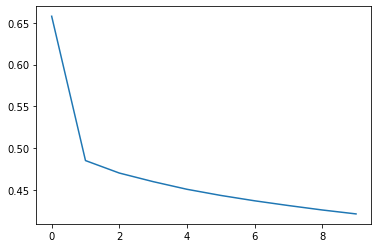

In [49]:
model_name = models[model_idx].__name__
model_export = f"NN_model_{model_name}_{uniqueid}_{val_acc}"
vis_dir = f'../{visuals_dir}/{model_export}'
model_save_dir = f'../{model_dir}/{model_export}'

# plotting training graph
plt.plot(history.history['loss'])
plt.savefig(f'{vis_dir}.png')


In [54]:
print(val_sentences[2])
print(val_labels[2])
print(model.predict(val_padded[2:3]))


haha didnt even notic babababa wors though lmao could new baba laugh
1
[[0.79388815]]


In [56]:
val_predictions = model.predict(val_padded)

In [57]:
# Only for BinaryCrossentropy
predictions = [1 if p > 0.5 else 0 for p in val_predictions]
predictions

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


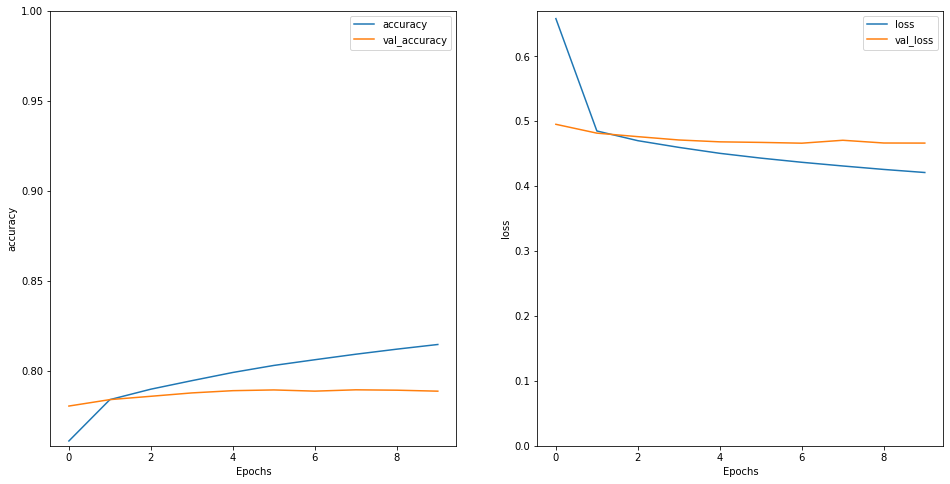

In [58]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.savefig(f'{vis_dir}_loss_acc.png')


In [59]:
model.save(model_save_dir)


INFO:tensorflow:Assets written to: ../models/NN_model_seven_13832119818114077935_0.7886080741882324\assets


INFO:tensorflow:Assets written to: ../models/NN_model_seven_13832119818114077935_0.7886080741882324\assets


In [60]:
loaded_model = load_model(model_save_dir)


In [61]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddinglayer (Embedding)  (None, 29, 64)            3200000   
                                                                 
 bidirectional (Bidirectiona  (None, 29, 64)           24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,251,777
Trainable params: 3,251,777
No

In [ ]:
# For debugging purposes


# model = keras.Model(inputs=model.input,
#                     outputs=[model.get_layer("embeddingL").output])

# feature = model.predict(val_padded)

# feature, feature.shape